<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE381L-DeepLearning/LAB5/Lab5_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
train_path='https://raw.githubusercontent.com/sknepal/DHDD_CSV/master/train.csv'
test_path='https://raw.githubusercontent.com/sknepal/DHDD_CSV/master/test.csv'

In [138]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [75]:
raw_data=pd.read_csv(train_path,skiprows = 1,header=None)

In [76]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
raw_data.shape

(16999, 1025)

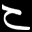

8


In [81]:
cv2_imshow(raw_data.loc[0,1:].to_numpy().reshape(32,32))
print(raw_data.loc[0,0])

In [139]:
def preprocess_data(raw_data):
  X=[]
  minmax=MinMaxScaler()
  onehot_enc=OneHotEncoder()
  for i in range(raw_data.shape[0]):
    X.append(minmax.fit_transform(raw_data.loc[i,1:].to_numpy().reshape(32,32)).flatten())
  y=raw_data.loc[:,0].to_numpy()
  

  return np.array(X),y

In [140]:
X,y=preprocess_data(data)

In [141]:
X.shape

(16999, 1024)

In [142]:
y.shape

(16999,)

In [146]:
model = Sequential()
model.add(Dense(4, input_dim=1024, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [147]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 4)                 4100      
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_31 (Dense)             (None, 10)                50        
Total params: 4,170
Trainable params: 4,170
Non-trainable params: 0
_________________________________________________________________


In [148]:
hist=model.fit(X, to_categorical(y), epochs=10, verbose=0)

In [150]:
hist.history

{'loss': [0.3227626383304596,
  0.21685181558132172,
  0.19854699075222015,
  0.18365676701068878,
  0.1739082783460617,
  0.1686473935842514,
  0.16497744619846344,
  0.16100741922855377,
  0.15672072768211365,
  0.15003246068954468]}